<a href="https://colab.research.google.com/github/2ohd647/CompCW/blob/main/Question_1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

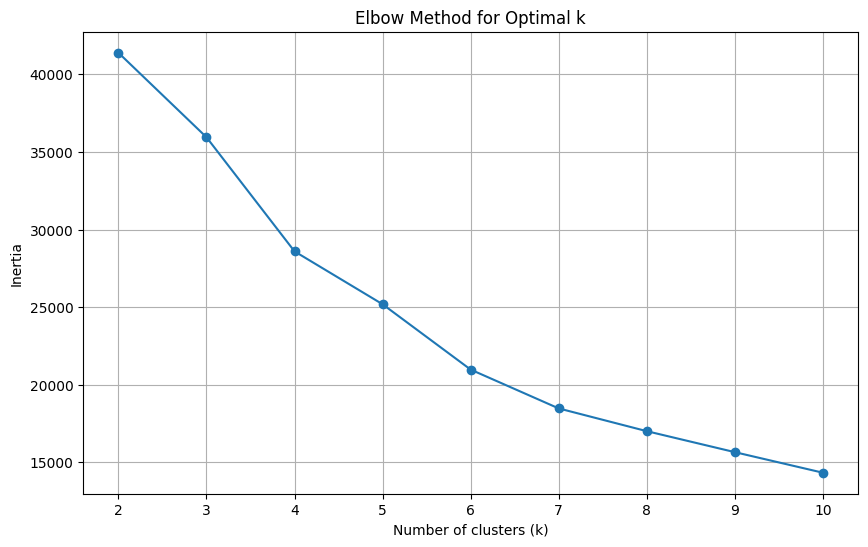

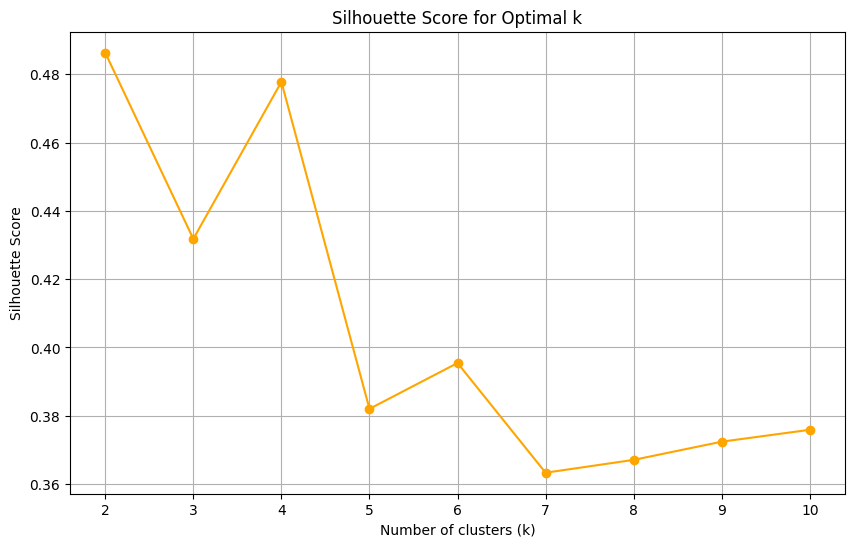

Cluster Centers (Mean of Each Cluster):
    BALANCE  PURCHASES  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS    TENURE
0  1.461717   0.241727      1.281816  0.488008          0.687635  0.268697
1 -0.351716  -0.134709     -0.302197 -0.195646         -0.157807  0.279626
2  1.311702   4.581684      2.071386  5.102023          0.556185  0.251084
3 -0.297372  -0.262668     -0.501095 -0.358576         -0.194335 -3.059734
Silhouette Score: 0.4777612414780734
Inertia: 28595.419198899443


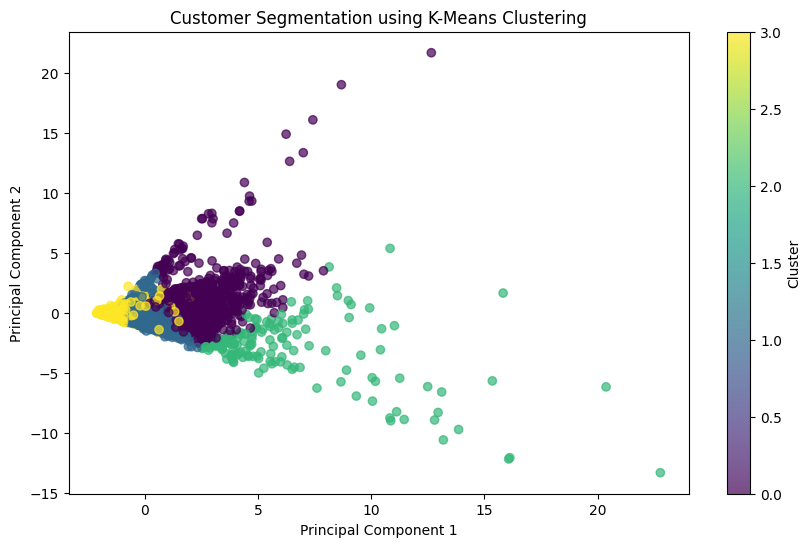

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('CC GENERAL.csv')

# Step 1: Preprocessing
# Handle missing values (simple imputation strategy here, but you can improve this)
# Exclude non-numeric columns from mean calculation
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Feature selection (drop irrelevant features such as 'CUST_ID')
features = df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]  # Example features, you can modify as needed

# Step 2: Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Optimal Cluster Selection using the Elbow Method
inertia = []
silhouette_scores = []

# Testing a range of cluster values (e.g., 2 to 10 clusters)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method to find optimal k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting Silhouette Score to help confirm the optimal k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Step 4: Applying K-Means with the chosen k (let's assume k=4 after inspecting the plots)
optimal_k = 4  # Based on Elbow method or silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Interpret results by examining the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print("Cluster Centers (Mean of Each Cluster):")
print(cluster_centers)

# Step 6: Evaluate performance using Silhouette Score and Inertia
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")
print(f"Inertia: {kmeans.inertia_}")

# Step 7: Visualizing the clusters (e.g., using the first two principal components or using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plotting the clusters on the 2D PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()




# Explanation of the Code

Loading the Dataset:

Replace 'your_dataset.csv' with the actual path to your dataset. Preprocessing:

The dataset is cleaned by filling missing values with the column mean (df.fillna(df.mean(), inplace=True)). We select a subset of relevant features like BALANCE, PURCHASES, CREDIT_LIMIT, etc., to represent customer behavior. Feature Scaling:

The StandardScaler is used to normalize the data, ensuring all features contribute equally to the clustering. Optimal Number of Clusters (k):

The Elbow Method is used to plot the Inertia (sum of squared distances from samples to centroids) for different values of k (clusters). We look for the "elbow" point, where the inertia begins to level off. Silhouette Score is also calculated to assess the quality of clustering. Higher silhouette scores suggest better-defined clusters. K-Means Clustering:

After determining the optimal number of clusters (e.g., k=4), K-Means is applied to the scaled features. The resulting cluster labels are assigned to the DataFrame as a new column ('Cluster'). Cluster Centers:

The centroids of the clusters are printed to interpret the average behavior of each cluster. Evaluation:

The Silhouette Score and Inertia are used to evaluate the quality of clustering. The silhouette score indicates how well-separated the clusters are. Visualization:

To visualize the clustering results, we use PCA (Principal Component Analysis) to reduce the dataset to 2 dimensions, making it easier to plot the clusters. Expected Output Elbow Method Plot: Helps in selecting the optimal number of clusters. Silhouette Score: Shows the quality of clustering. Cluster Centers: Provides the average behavior of each customer segment. Cluster Visualization: A 2D plot that shows how the customers are grouped based on the first two principal components.

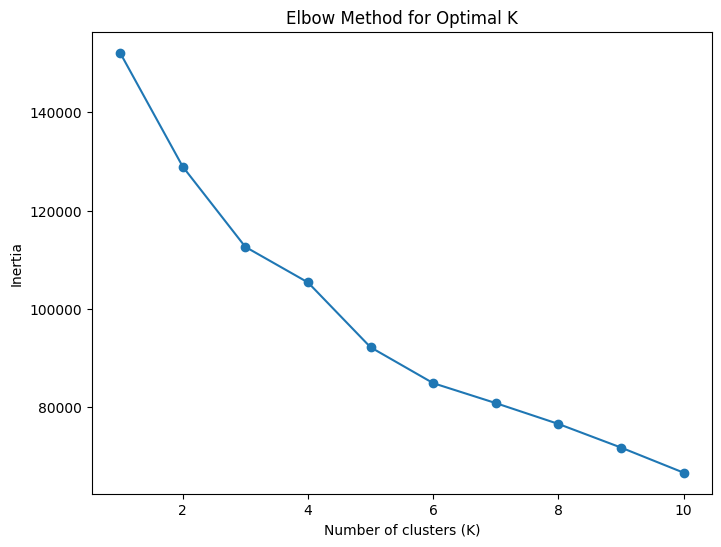

Silhouette Score: 0.17


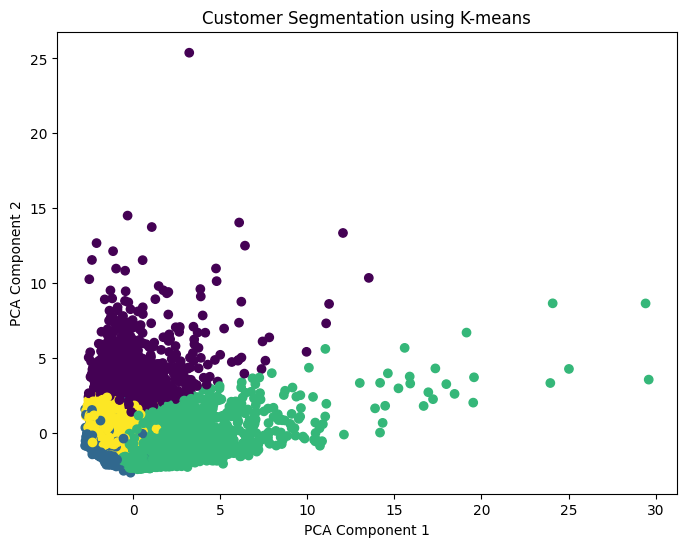

Cluster Centroids:
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  1.668482           0.379847  -0.130672         -0.082658   
1 -0.699072          -1.959157  -0.304986         -0.241643   
2 -0.149443           0.411562   0.551465          0.390972   
3 -0.030426           0.377251  -0.337608         -0.230970   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.157231      1.955351            -0.398442   
1               -0.276859     -0.323962            -0.421838   
2                0.585261     -0.354967             1.091535   
3               -0.373694     -0.088460            -0.708633   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.135258                         -0.360719   
1                   -0.434756                         -0.324939   
2                    0.628970                          0.965455   
3                   -0.350561                         -0.645713   

   CASH_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load your dataset
data = pd.read_csv('CC GENERAL.csv')

# Step 2: Data Preprocessing
# Drop customer identifier, as it is not needed for clustering
data_cleaned = data.drop(columns=['CUST_ID'])

# Handle missing values (optional, depends on your data)
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Step 4: Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Step 5: Use the silhouette score to determine the best number of clusters
best_k = 4  # Choose the best k from the elbow method or silhouette analysis
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Step 6: Add the cluster labels to the original data
data['Cluster'] = clusters

# Step 7: Evaluate the clustering using silhouette score
sil_score = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {sil_score:.2f}')

# Step 8: Visualize the clusters (if needed, use PCA or t-SNE for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plotting the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segmentation using K-means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 9: Analyzing the cluster centroids (optional)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data_cleaned.columns)
print('Cluster Centroids:')
print(centroids)

# The data with cluster labels is now available as `data` with the 'Cluster' column